In [ ]:
!pip install tf-keras-vis tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 1.7 MB/s eta 0:00:00


# carga vis

In [ ]:
#!git clone https://github.com/keisen/tf-keras-vis

In [ ]:
#ls

In [ ]:
#cd tf-keras-vis

In [ ]:
#cd examples/

Attentions
==========


In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 0 GPUs


In [ ]:
# Basic packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
import datetime as dt   

# Machine learning packages 
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reducción de dimensiones 
from sklearn.decomposition import PCA

# Regresión lineal 
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras.layers import Input, LSTM, Dense
from keras.models import Model
from keras.layers import Lambda
from keras import backend as K


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train




In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-03-27 15:07:49--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 173.194.202.102, 173.194.202.113, 173.194.202.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn81ls37e71p1n7m4ju7d3jfk1mhap73/1679929650000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=d102b048-3fa0-43c2-a301-be2447abc012 [following]
--2023-03-27 15:07:50--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn81ls37e71p1n7m4ju7d3jfk1mhap73/1679929650000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=d102b048-3fa0-43c2-a301-be2447abc012
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 74.125.199.13

In [ ]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')
df.set_index('Date', inplace=True)
df.fillna(df.mean(), inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

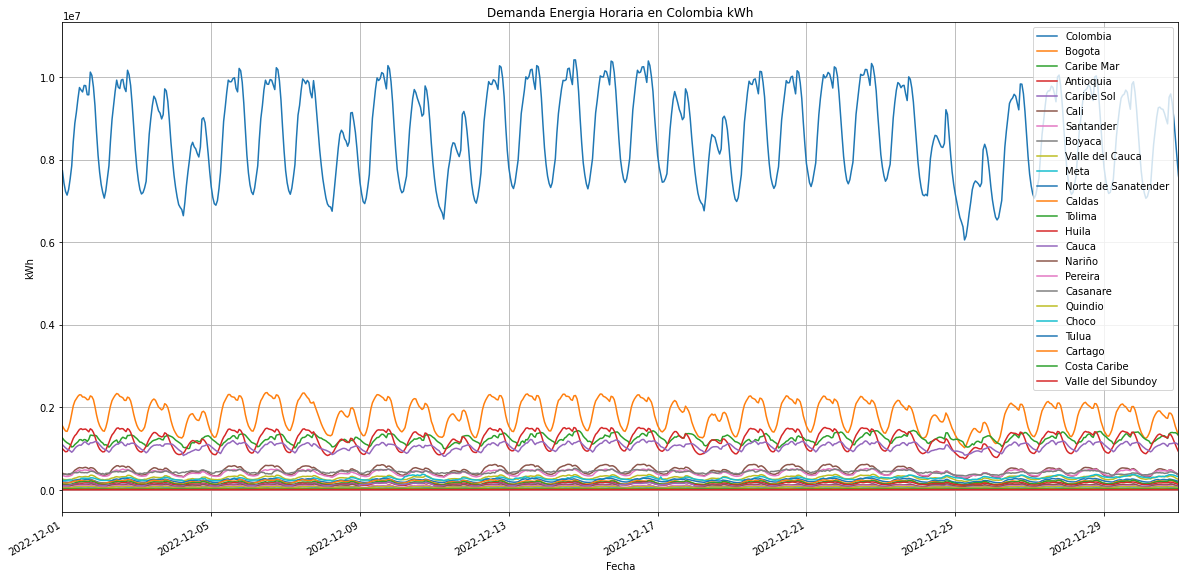

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

In [ ]:
df_max=max(df['Colombia'])
# print(df_max)
df1=df.values
df1=df1/df_max

In [ ]:
# df1=df.copy()
# #scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler.fit(df1)
# df1=scaler.transform(df1)

In [ ]:
Ts1=df1.copy()
out=df1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 24)
Tamaño Serie Salida:  (19728,)


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 24

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_train1 = X1[:int(len(X1)*0.8)]
X_test1 = X1[int(len(X1)*0.8):]

# X_test1=X_test1.reshape(len(X_test1),step_back)
# X_train1=X_train1.reshape(len(X_train1),step_back)

Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1 = Y1[int(len(Y1)*0.8):]

# Y_test1=Y_test1.reshape(len(Y_test1))
# Y_train1=Y_train1.reshape(len(Y_train1))

In [ ]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15762, 24, 24) Tamaño Y_train1:  (15762,)
Tamaño X_test1:  (3941, 24, 24) Tamaño Y_test1:  (3941,)
-----------------------------------------------------------------------


In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1ilFeeShpul11sMPiTwJbiGbs8hRjnQ02"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O N_Model.h5 && rm -rf /tmp/cookies.txt
# !unzip Departamentos.zip
!dir

--2023-03-27 15:08:13--  https://docs.google.com/uc?export=download&confirm=&id=1ilFeeShpul11sMPiTwJbiGbs8hRjnQ02
Resolving docs.google.com (docs.google.com)... 173.194.202.138, 173.194.202.139, 173.194.202.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uku7veuep8j0i78hs7kbd0ntiqgec8ki/1679929650000/15940467605774616319/*/1ilFeeShpul11sMPiTwJbiGbs8hRjnQ02?e=download&uuid=3e901965-1adf-4735-9398-02a4a1d25836 [following]
--2023-03-27 15:08:15--  https://doc-00-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uku7veuep8j0i78hs7kbd0ntiqgec8ki/1679929650000/15940467605774616319/*/1ilFeeShpul11sMPiTwJbiGbs8hRjnQ02?e=download&uuid=3e901965-1adf-4735-9398-02a4a1d25836
Resolving doc-00-6k-docs.googleusercontent.com (doc-00-6k-docs.googleusercontent.com)... 74.125.199.13

# Cargo de Modelo

In [ ]:
model = tf.keras.models.load_model('/content/N_Model.h5')

# model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24, 24)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 24, 100)           50000     
                                                                 
 re_lu_6 (ReLU)              (None, 24, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 24, 100)           80400     
                                                                 
 re_lu_7 (ReLU)              (None, 24, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 24, 100)           80400     
                                                                 
 re_lu_8 (ReLU)              (None, 24, 100)           0   

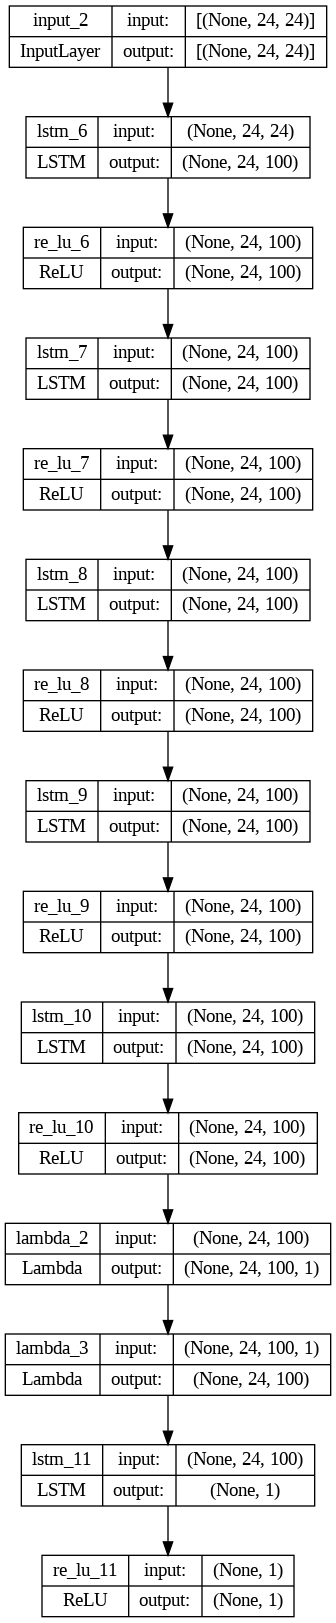

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

### Load and preprocess images

tf-keras-vis supports batch-wise visualization. Here, we load and preprocess three pictures of goldfish, bear and assault-rifle as input data.

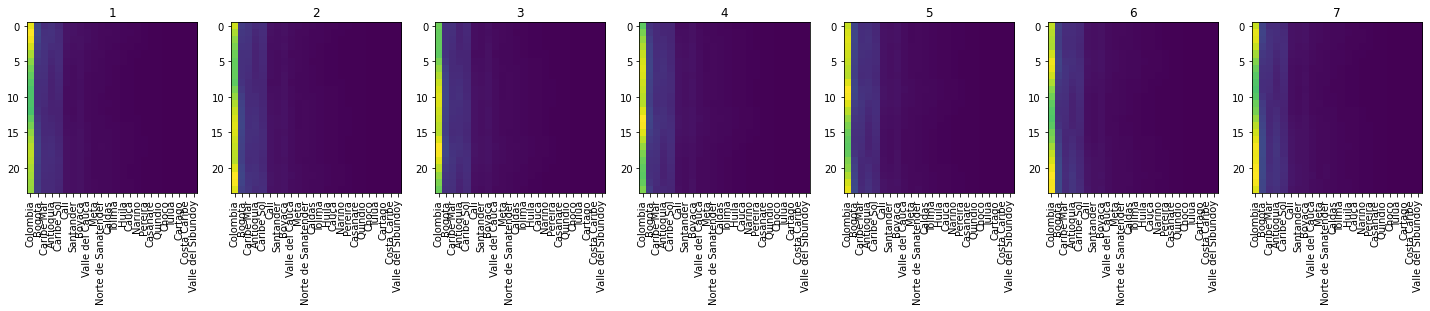

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Image titles
image_titles = ['1', '2', '3','4','5','6','7']

# Load images and Convert them to a Numpy array
img1=X_test1[0,:,:]
img2=X_test1[4,:,:]
img3=X_test1[8,:,:]
img4=X_test1[12,:,:]
img5=X_test1[16,:,:]
img6=X_test1[20,:,:]
img7=X_test1[24,:,:]
images =[img1, img2, img3, img4, img5, img6, img7]
images=np.array(images)

# Preparing input data for VGG16
# X = preprocess_input(images)
X = images.copy()
# Rendering
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(25, 6))
for i, title in enumerate(image_titles):
  ax[i].set_title(title)
  ax[i].imshow(images[i])
  ax[i].set_xticks(np.arange(24))
  ax[i].set_xticklabels(df.columns,rotation=90)

# # Girar las etiquetas del eje x 90 grados
# plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=90)

# Ajustar el diseño de la figura y mostrarla
plt.subplots_adjust(wspace=0.2)
plt.show()

Implement functions required to use attentions
----------------------------------------------

### Model modifier

When the softmax activation function is applied to the last layer of model, it may obstruct generating the attention images, so you should replace the function to a linear activation function. Although we create and use `ReplaceToLinear` instance here, we can also use the model modifier function defined by ourselves.

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

### Score function

And then, you **MUST** create `Score` instance or define `score function` that returns target scores. Here, they return the score values corresponding Goldfish, Bear, Assault Rifle.

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([1])

# Instead of using CategoricalScore object,
# you can also define the function from scratch as follows:
def score_function(output):
    # The `output` variable refers to the output of the model,
    # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
    return (output[0][0],output[1][0],output[2][0],output[3][0],output[4][0],output[5][0],output[6][0])

# Y_test1[0],Y_test1[100],Y_test1[500]

## Vanilla Saliency

`Saliency` generates a saliency map that appears the regions of ​​the input image that contributes the most to the output value.

In [ ]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

CPU times: user 578 µs, sys: 0 ns, total: 578 µs
Wall time: 588 µs


In [ ]:

# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score_function, X)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
# f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#   ax[i].set_title(title, fontsize=16)
#   ax[i].imshow(saliency_map[i], cmap='jet')
#   ax[i].axis('off')
# plt.tight_layout()
# plt.show()

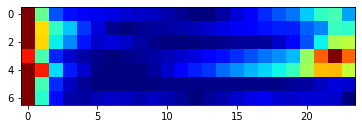

In [ ]:
plt.imshow(saliency_map,cmap='jet')

## SmoothGrad

As you can see above, Vanilla Saliency map is too noisy, so let's remove noise in the saliency map using SmoothGrad! SmoothGrad is a method that reduce the noise in saliency map by adding noise to input image.

**Note:** Because SmoothGrad calculates the gradient repeatedly, it might take much time around 2-3 minutes when using CPU.

In [ ]:
%%time

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score_function,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
# f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     ax[i].set_title(title, fontsize=14)
#     ax[i].imshow(saliency_map[i], cmap='jet')
#     ax[i].axis('off')
# plt.tight_layout()
# plt.savefig('images/smoothgrad.png')
# plt.show()

CPU times: user 9.99 s, sys: 43.7 ms, total: 10 s
Wall time: 10.1 s


<class 'numpy.ndarray'> (7, 24)


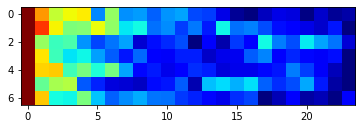

In [ ]:
print(type(saliency_map),saliency_map.shape)
plt.imshow(saliency_map,cmap='jet')

## GradCAM

Saliency is one of useful way of visualizing attention that appears the regions of the input image that contributes the most to the output value.
GradCAM is another way of visualizing attention over input. Instead of using gradients of model outputs, it uses of penultimate layer output (that is the convolutional layer just before Dense layers).

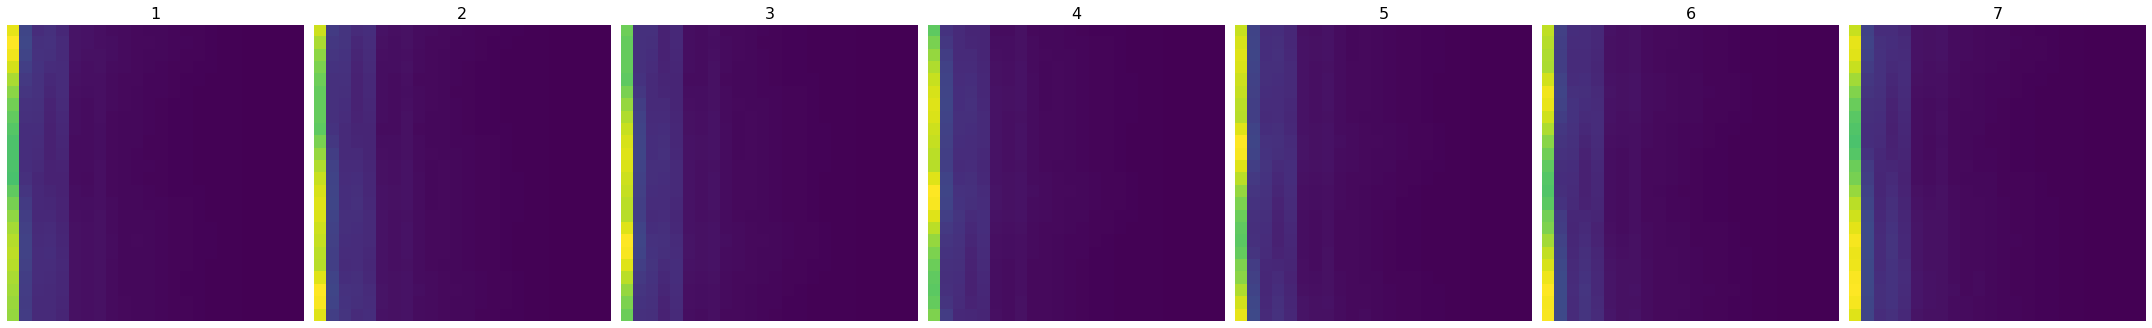

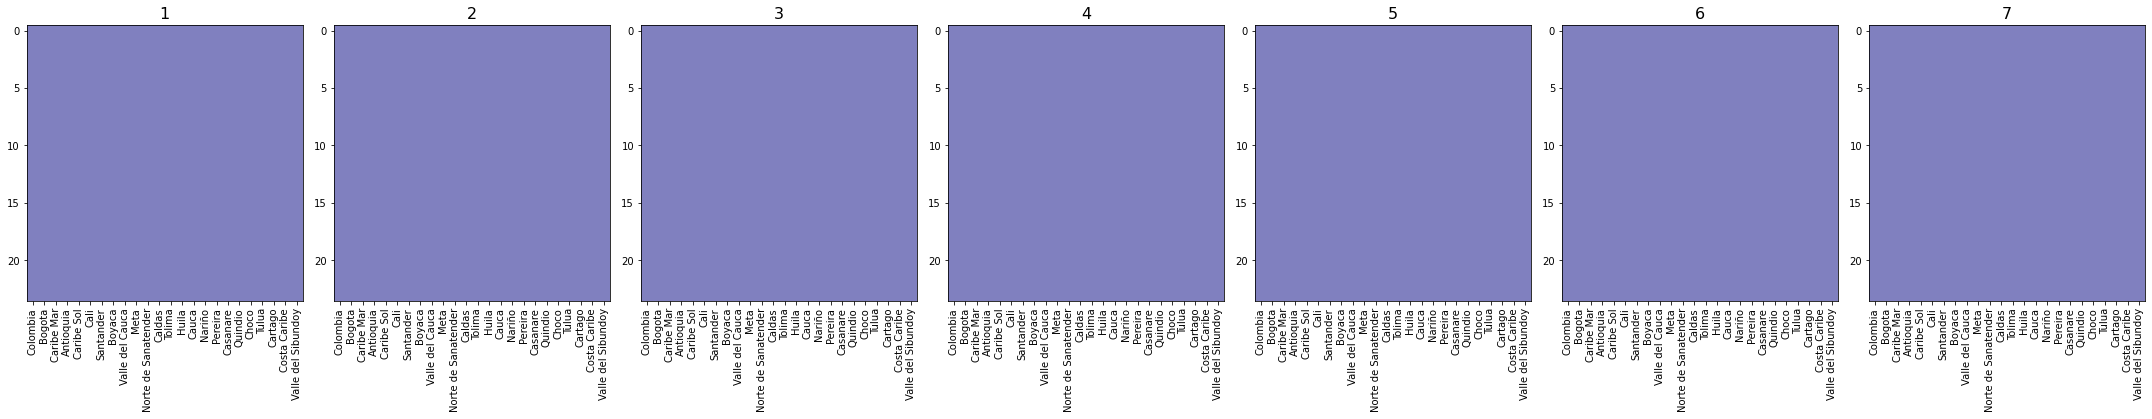

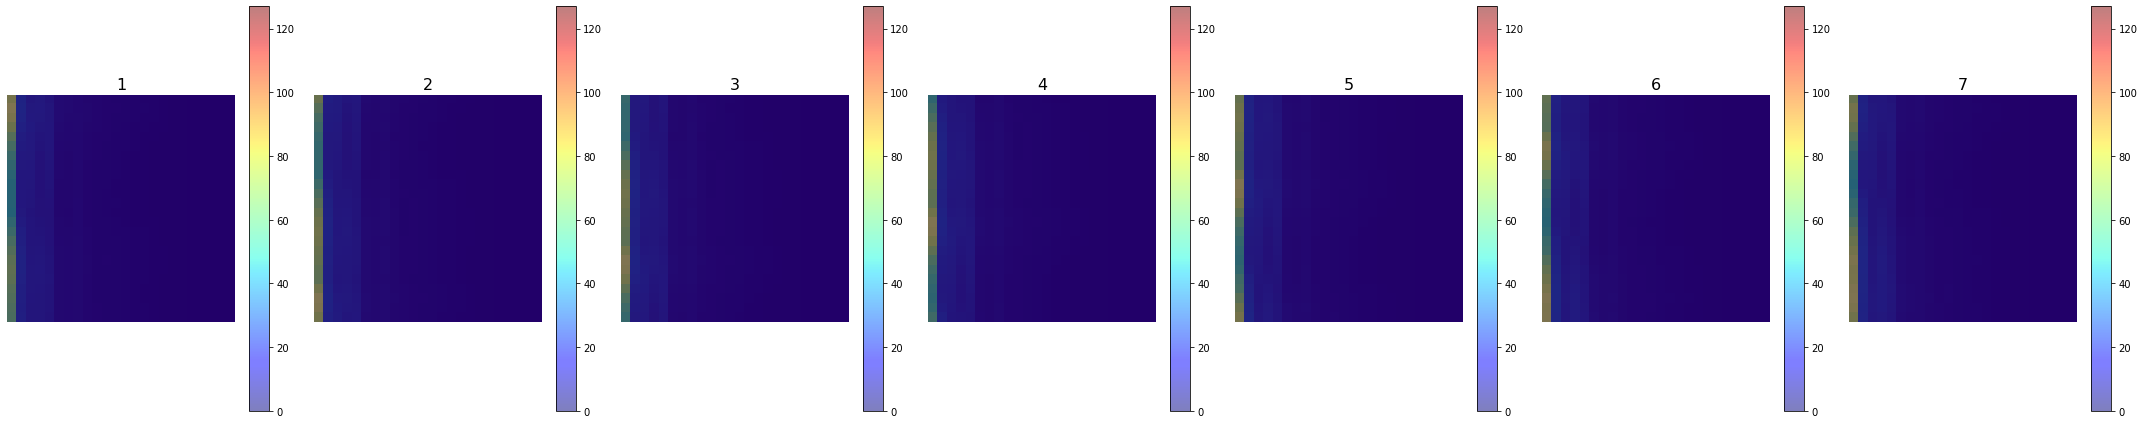

CPU times: user 7.08 s, sys: 400 ms, total: 7.48 s
Wall time: 7.24 s


In [ ]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score_function,
              X,
              penultimate_layer=-4,seek_penultimate_conv_layer=False)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
#     ax[i].set_title(title, fontsize=16)
#     ax[i].imshow(images[i])
#     ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
#     ax[i].axis('off')
# plt.tight_layout()
# plt.show()

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))

for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    # im = ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
    # plt.colorbar(im, ax=ax[i])

plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    # ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(24))
    ax[i].set_xticklabels(df.columns,rotation=90)
plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))

for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    im = ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
    plt.colorbar(im, ax=ax[i])

plt.tight_layout()
plt.show()

As you can see above, GradCAM is useful method for intuitively knowing where the attention is. However, when you take a look closely, you'll see that the visualized attentions don't completely cover the target (especially the head of Bear) in the picture.

Okay then, let's move on to next method that is able to fix the problem above you looked.

## GradCAM++

GradCAM++ can provide better visual explanations of CNN model predictions.

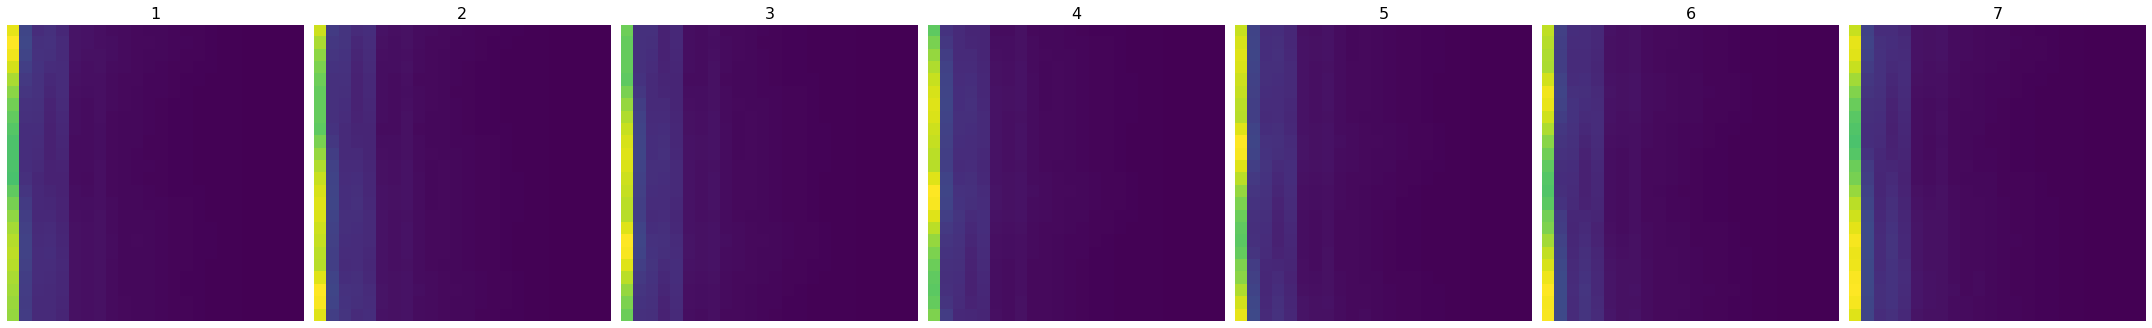

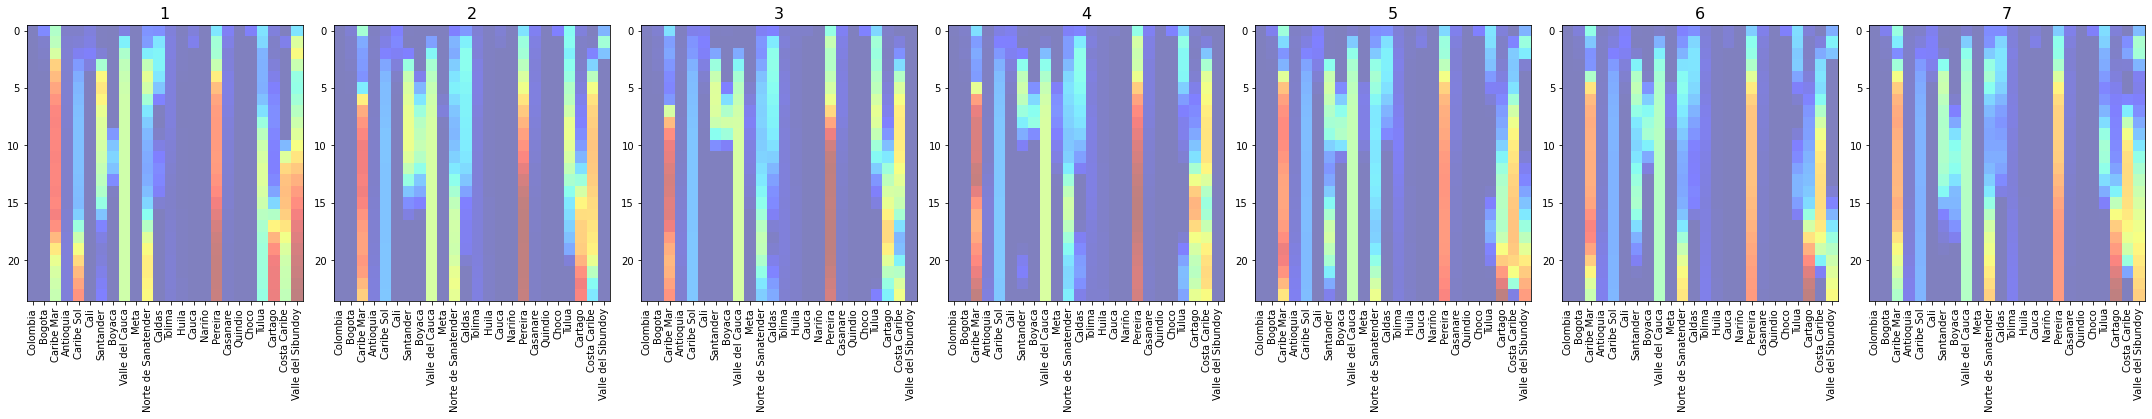

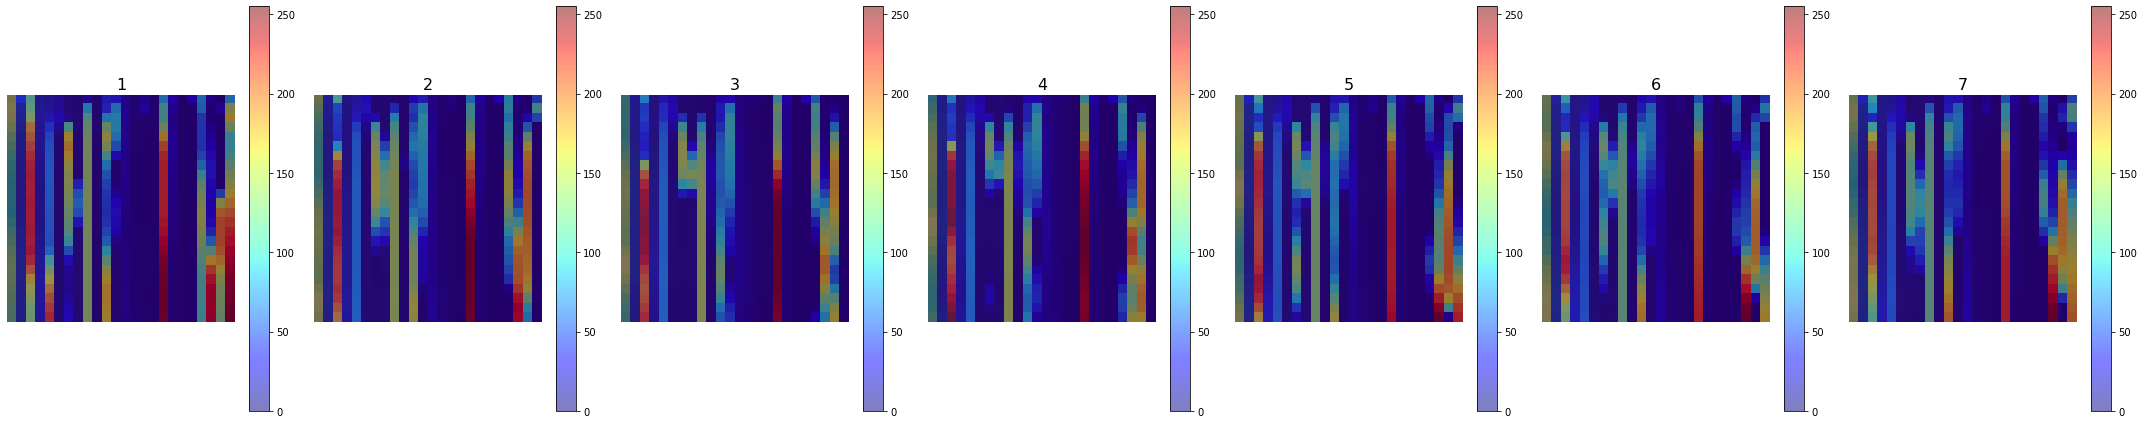

CPU times: user 6.3 s, sys: 461 ms, total: 6.76 s
Wall time: 6.35 s


In [ ]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Create GradCAM++ object
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam = gradcam(score_function,
              X,
              penultimate_layer=-4,seek_penultimate_conv_layer=False)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
#     ax[i].set_title(title, fontsize=16)
#     ax[i].imshow(images[i])
#     ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
#     ax[i].axis('off')
# plt.tight_layout()
# plt.show()


f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))

for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    # im = ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
    # plt.colorbar(im, ax=ax[i])

plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    # ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(24))
    ax[i].set_xticklabels(df.columns,rotation=90)
plt.tight_layout()
plt.show()

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(30, 6))

for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i]) * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    im = ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
    plt.colorbar(im, ax=ax[i])

plt.tight_layout()
plt.show()

As you can see above, Now, the visualized attentions almost completely cover the target objects!

## ScoreCAM

In the end, Here, we show you ScoreCAM. It is an another method that generates Class Activation Map. The characteristic of this method is that it's the `gradient-free` method unlike GradCAM, GradCAM++ or Saliency.

22/22 [==============================] - 3s 39ms/step


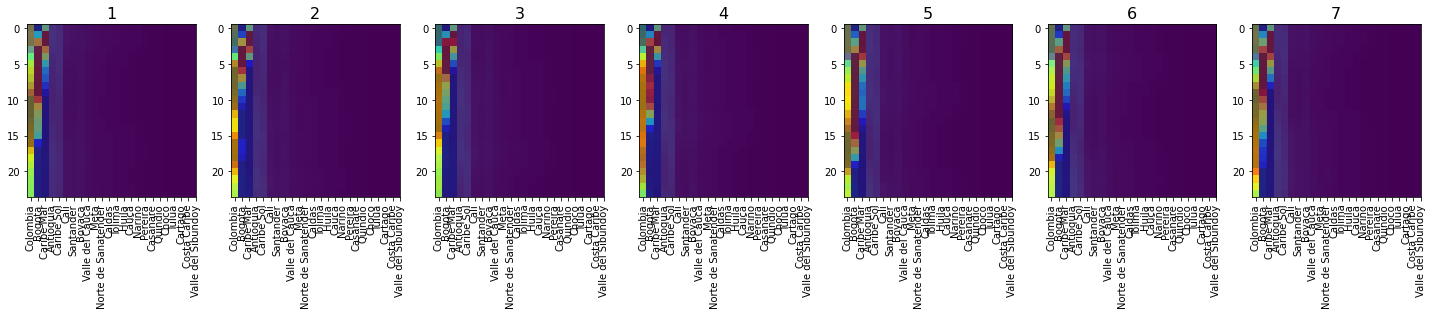

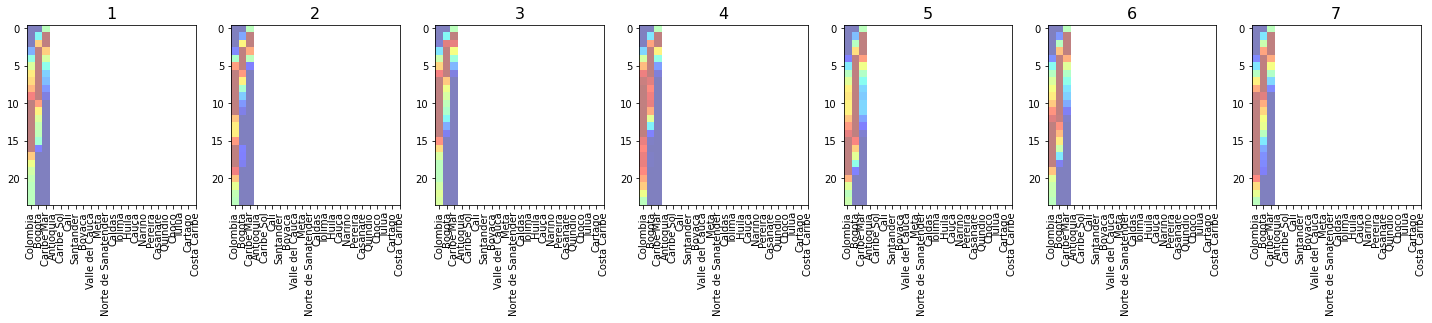

CPU times: user 8.17 s, sys: 395 ms, total: 8.57 s
Wall time: 8.29 s


In [ ]:
%%time

from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model)

# Generate heatmap with ScoreCAM
cam = scorecam(score_function, X, penultimate_layer=-3,seek_penultimate_conv_layer=False)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(24))
    ax[i].set_xticklabels(df.columns,rotation=90)
plt.tight_layout()
plt.show()

# Render
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    # ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(23))
    ax[i].set_xticklabels(df.columns[:23],rotation=90)
plt.tight_layout()
plt.show()

As you can see above, The visualized images are more sophisticated!

## Faster-ScoreCAM

ScoreCAM is a great method, however, it takes a bit more time to process it than other cam methods.
There is a good news for us. Faster-ScorecAM that makes ScoreCAM to be more efficient was devised by @tabayashi0117.

https://github.com/tabayashi0117/Score-CAM/blob/master/README.md#faster-score-cam

> We thought that several channels were dominant in generating the final heat map. Faster-Score-CAM adds the processing of “use only channels with large variances as mask images” to Score-CAM. (max_N = -1 is the original Score-CAM).


4/4 [==============================] - 3s 33ms/step


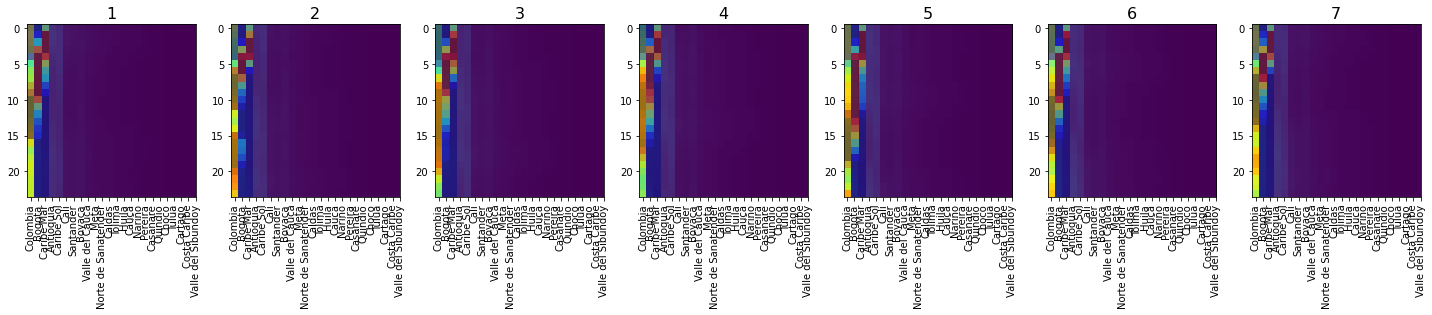

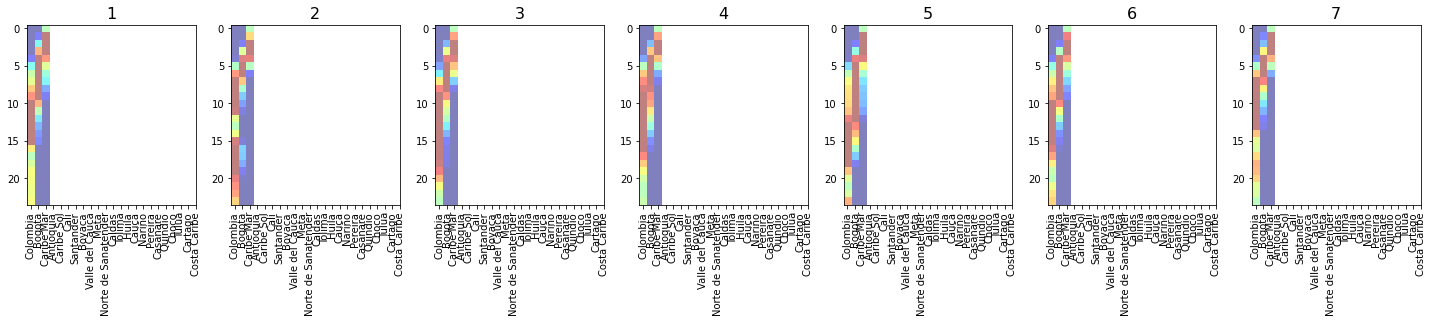

CPU times: user 8.56 s, sys: 370 ms, total: 8.93 s
Wall time: 8.8 s


In [ ]:
%%time

from tf_keras_vis.scorecam import Scorecam

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=replace2linear)

# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score_function,
               X,
               penultimate_layer=-3,seek_penultimate_conv_layer=False,
               max_N=10)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(24))
    ax[i].set_xticklabels(df.columns,rotation=90)
plt.tight_layout()
plt.show()

# Render
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    # ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('on')
    ax[i].set_xticks(np.arange(23))
    ax[i].set_xticklabels(df.columns[:23],rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from requests import get
filename = get("http://172.28.0.12:9000/api/sessions").json()[0]["name"]
print(filename)

01_MV_LSTM_Orden_Demanda_CAM_TruncatedNormal.ipynb


In [ ]:
from requests import get
from socket import gethostname, gethostbyname
ip = gethostbyname(gethostname()) # 172.28.0.12
filename = get(f"http://{ip}:9000/api/sessions").json()[0]["name"]
print(filename)

01_MV_LSTM_Orden_Demanda_CAM_TruncatedNormal.ipynb


In [ ]:
colab_ip = %system hostname -I   # uses colab magic to get list from bash
colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
colab_port = 9000                # could use 6000, 8080, or 9000

import requests
filename2 = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
# Output will be of the form "xyz.ipynb"
print(filename2)

01_MV_LSTM_Orden_Demanda_CAM_TruncatedNormal.ipynb


In [ ]:
# Gives IP address
!hostname -I
print()  # empty line
# Gives IP addresses with port numbers
!sudo lsof -i -P -n | grep LISTEN

172.28.0.12 

node        7 root   21u  IPv6  19833      0t0  TCP *:8080 (LISTEN)
kernel_ma  34 root    7u  IPv4  18609      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fil  60 root    3u  IPv4  19811      0t0  TCP *:3453 (LISTEN)
colab-fil  60 root    4u  IPv6  19812      0t0  TCP *:3453 (LISTEN)
jupyter-n  81 root    4u  IPv4  19037      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3   232 root   23u  IPv4  22205      0t0  TCP 127.0.0.1:40871 (LISTEN)
python3   263 root    3u  IPv4  21378      0t0  TCP 127.0.0.1:19679 (LISTEN)
python3   263 root    5u  IPv4  21379      0t0  TCP 127.0.0.1:36907 (LISTEN)
